<a href="https://colab.research.google.com/github/linhhvo/emotion-classifier/blob/main/custom_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install ipython-autotime

%load_ext autotime

time: 121 µs (started: 2021-04-23 14:46:06 +00:00)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import sys
import os
import random

time: 1.51 s (started: 2021-04-23 14:46:06 +00:00)


In [6]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/
time: 25.7 s (started: 2021-04-23 14:46:08 +00:00)


In [7]:
!unzip drive/MyDrive/images.zip > /dev/null

time: 3.06 s (started: 2021-04-23 14:46:33 +00:00)


In [8]:
labels = os.listdir('train')
labels

['disgust', 'fear', 'sad', 'angry', 'surprise', 'happy', 'neutral']

time: 6.89 ms (started: 2021-04-23 14:46:37 +00:00)


In [9]:
np.random.seed(212)
tf.random.set_seed(101)

time: 2.78 ms (started: 2021-04-23 14:46:37 +00:00)


In [29]:
train_batches = image_dataset_from_directory(
    directory='train', 
    label_mode='categorical',
    image_size=(48, 48), 
    # batch_size=100,
    color_mode='grayscale')

validate_batches = image_dataset_from_directory(
    directory='validation', 
    label_mode='categorical',
    image_size=(48, 48), 
    color_mode='grayscale', 
    # batch_size=100, 
    shuffle=False)

Found 20725 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
time: 995 ms (started: 2021-04-23 15:53:06 +00:00)


In [11]:
test_batches = image_dataset_from_directory(
    directory='drive/MyDrive/test',
    label_mode='categorical',
    image_size=(48,48),
    color_mode='grayscale'
)

Found 193 files belonging to 7 classes.
time: 638 ms (started: 2021-04-23 14:46:43 +00:00)


## Model 1

In [12]:
model = Sequential()

model.add(Conv2D(128, 3, activation='relu', padding='same', input_shape=(48,48,1)))
model.add(Conv2D(128, 3, activation='relu', padding='same'))

model.add(MaxPooling2D())

model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding='same'))

model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(Conv2D(64, 3, activation='relu', padding='same'))

model.add(MaxPooling2D())

model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Conv2D(256, 3, activation='relu', padding='same'))


model.add(Flatten())
model.add(Dense(1024, activation='relu'))

model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        7

In [13]:
model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

time: 14 ms (started: 2021-04-23 14:46:44 +00:00)


In [14]:
history = model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=validate_batches,
    validation_steps=len(validate_batches),
    epochs=30
)

Epoch 1/30
208/208 [==============================] - 54s 97ms/step - loss: 3.0889 - accuracy: 0.1709 - val_loss: 1.8399 - val_accuracy: 0.2450
Epoch 2/30
208/208 [==============================] - 20s 94ms/step - loss: 1.7337 - accuracy: 0.3244 - val_loss: 1.7682 - val_accuracy: 0.2920
Epoch 3/30
208/208 [==============================] - 20s 93ms/step - loss: 1.5998 - accuracy: 0.3793 - val_loss: 1.6868 - val_accuracy: 0.3575
Epoch 4/30
208/208 [==============================] - 20s 93ms/step - loss: 1.4850 - accuracy: 0.4329 - val_loss: 1.6371 - val_accuracy: 0.3830
Epoch 5/30
208/208 [==============================] - 20s 93ms/step - loss: 1.3595 - accuracy: 0.4792 - val_loss: 1.5884 - val_accuracy: 0.4005
Epoch 6/30
208/208 [==============================] - 20s 93ms/step - loss: 1.2385 - accuracy: 0.5319 - val_loss: 1.6220 - val_accuracy: 0.4100
Epoch 7/30
208/208 [==============================] - 20s 93ms/step - loss: 1.1180 - accuracy: 0.5777 - val_loss: 1.8136 - val_accuracy:

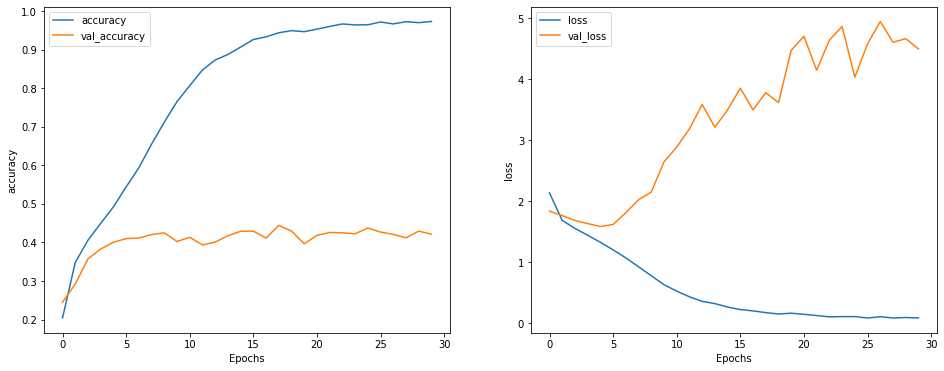

time: 408 ms (started: 2021-04-23 14:57:14 +00:00)


In [15]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '') # for validation results
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.subplot(1,2,2)
plot_graphs(history, 'loss')

In [16]:
train_loss, train_acc = model.evaluate(train_batches, verbose=0)
print('Train Accuracy: {:.2f}'.format(train_acc))

valid_loss, valid_acc = model.evaluate(validate_batches, verbose=0)
print('Validation Accuracy: {:.2f}'.format(valid_acc))

test_loss, test_acc = model.evaluate(test_batches, verbose=0)
print('Test Accuracy: {:.2f}'.format(test_acc))

Train Accuracy: 0.88
Validation Accuracy: 0.42
Test Accuracy: 0.42
time: 1min 7s (started: 2021-04-23 14:57:14 +00:00)


## Model 2

In [17]:
np.random.seed(212)
tf.random.set_seed(101)

time: 7.85 ms (started: 2021-04-23 14:58:22 +00:00)


In [30]:
model_2 = Sequential()

model_2.add(Conv2D(128, 3, 
	activation='relu', 
	padding='same', 
	input_shape=(48,48,1), 
	kernel_regularizer='l2')) #added regularizer
model_2.add(BatchNormalization())

model_2.add(Conv2D(128, 3, activation='relu', padding='same'))
model_2.add(BatchNormalization())

model_2.add(MaxPooling2D())
model_2.add(Dropout(0.5))

model_2.add(Conv2D(128, 3, activation='relu', padding='same'))
model_2.add(BatchNormalization())

model_2.add(Conv2D(128, 3, activation='relu', padding='same'))
model_2.add(BatchNormalization())

model_2.add(MaxPooling2D())
model_2.add(Dropout(0.5))

model_2.add(Conv2D(64, 3, activation='relu', padding='same'))
model_2.add(BatchNormalization())

model_2.add(Conv2D(64, 3, activation='relu', padding='same'))
model_2.add(BatchNormalization())

model_2.add(MaxPooling2D())
model_2.add(Dropout(0.5))

model_2.add(Conv2D(256, 3, activation='relu', padding='same'))
model_2.add(BatchNormalization())

model_2.add(Conv2D(256, 3, activation='relu', padding='same'))
model_2.add(BatchNormalization())

model_2.add(MaxPooling2D())
model_2.add(Dropout(0.5))

model_2.add(Flatten())

model_2.add(Dense(1024, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

# added this block
model_2.add(Dense(512, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(7, activation='softmax'))

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 48, 48, 128)       1280      
_________________________________________________________________
batch_normalization_20 (Batc (None, 48, 48, 128)       512       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 48, 48, 128)       147584    
_________________________________________________________________
batch_normalization_21 (Batc (None, 48, 48, 128)       512       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 128)      

In [31]:
lr_schedule = ExponentialDecay(0.001, decay_steps=100000, decay_rate=0.95, staircase=True)

model_2.compile(
    optimizer=Adam(learning_rate=lr_schedule), # used nadam optimizer
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

time: 12.1 ms (started: 2021-04-23 15:53:56 +00:00)


In [32]:
earlystopper = EarlyStopping(
    patience=20,
    restore_best_weights=True,
    verbose=1)

reducelr = ReduceLROnPlateau(
    factor=np.sqrt(.1),
    patience=5,
    verbose=1)

history_2 = model_2.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=validate_batches,
    validation_steps=len(validate_batches),
    epochs=50,
    callbacks=[earlystopper, reducelr]
)

Epoch 1/50
648/648 [==============================] - 32s 44ms/step - loss: 2.6848 - accuracy: 0.1735 - val_loss: 1.8691 - val_accuracy: 0.2515
Epoch 2/50
648/648 [==============================] - 27s 42ms/step - loss: 1.9484 - accuracy: 0.2653 - val_loss: 1.8424 - val_accuracy: 0.3025
Epoch 3/50
648/648 [==============================] - 27s 42ms/step - loss: 1.6249 - accuracy: 0.3798 - val_loss: 1.7924 - val_accuracy: 0.3815
Epoch 4/50
648/648 [==============================] - 27s 42ms/step - loss: 1.4698 - accuracy: 0.4406 - val_loss: 1.8296 - val_accuracy: 0.3790
Epoch 5/50
648/648 [==============================] - 27s 41ms/step - loss: 1.3588 - accuracy: 0.4875 - val_loss: 1.6520 - val_accuracy: 0.4155
Epoch 6/50
648/648 [==============================] - 27s 41ms/step - loss: 1.2828 - accuracy: 0.5160 - val_loss: 1.5848 - val_accuracy: 0.4195
Epoch 7/50
648/648 [==============================] - 27s 41ms/step - loss: 1.2296 - accuracy: 0.5369 - val_loss: 1.4274 - val_accuracy:

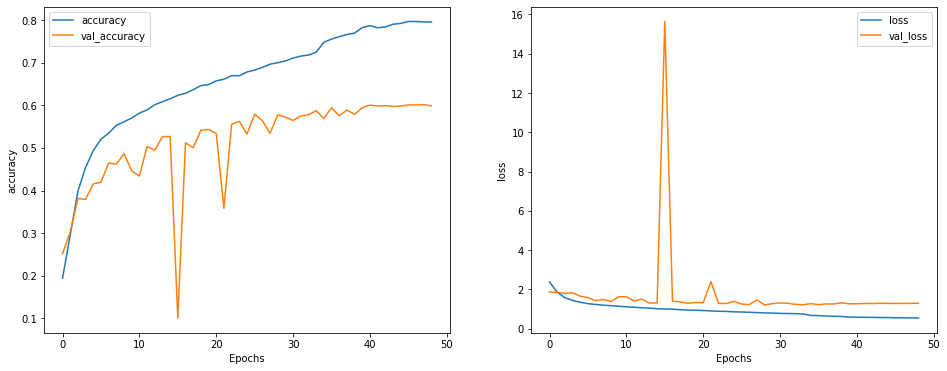

time: 332 ms (started: 2021-04-23 16:16:15 +00:00)


In [33]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_graphs(history_2, 'accuracy')
plt.subplot(1,2,2)
plot_graphs(history_2, 'loss')

In [34]:
train_loss_2, train_acc_2 = model_2.evaluate(train_batches, verbose=0)
print('Train Accuracy: {:.2f}'.format(train_acc_2))

valid_loss_2, valid_acc_2 = model_2.evaluate(validate_batches, verbose=0)
print('Validation Accuracy: {:.2f}'.format(valid_acc_2))

test_loss_2, test_acc_2 = model_2.evaluate(test_batches, verbose=0)
print('Test Accuracy: {:.2f}'.format(test_acc_2))

Train Accuracy: 0.78
Validation Accuracy: 0.58
Test Accuracy: 0.46
time: 12.3 s (started: 2021-04-23 16:16:15 +00:00)


In [37]:
print(test_batches.take(1))

<TakeDataset shapes: ((None, 48, 48, 1), (None, 7)), types: (tf.float32, tf.float32)>
time: 5.75 ms (started: 2021-04-23 16:34:06 +00:00)


In [44]:
predictions = model.predict(test_batches)
print(np.argmax(predictions[0]))
print()

0

time: 280 ms (started: 2021-04-23 16:37:24 +00:00)


In [ ]:
test_labels[0]

In [ ]:
plt.figure(figsize=(10, 10))
class_names = test_batches.class_names
for images, labels in test_batches.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.title(class_names[labels[i]])
        plt.axis("off")